In [31]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
%matplotlib inline

### Convert mp3 data to wav format

In [12]:
from pydub import AudioSegment

path = './sounds/'                                                                    
src = 'Parus-Belgium-Geel, Antwerpen, Vlaanderen-call-A-399247.mp3'
dst = src[-10:-3] + 'wav' 

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(path + src)
sound.export(path + dst, format="wav")

<_io.BufferedRandom name='./sounds/399247.wav'>

### Listen to the example

In [26]:
import IPython.display as ipd  # To play sound in the notebook
fname = path + dst
ipd.Audio(fname)

In [27]:
from scipy.io import wavfile
rate, data = wavfile.read(fname)
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", data.shape)
print(data)

Sampling (frame) rate =  48000
Total samples (frames) =  (577152, 2)
[[  0   0]
 [  0   0]
 [  0   0]
 ...
 [136 136]
 [  7   7]
 [126 126]]


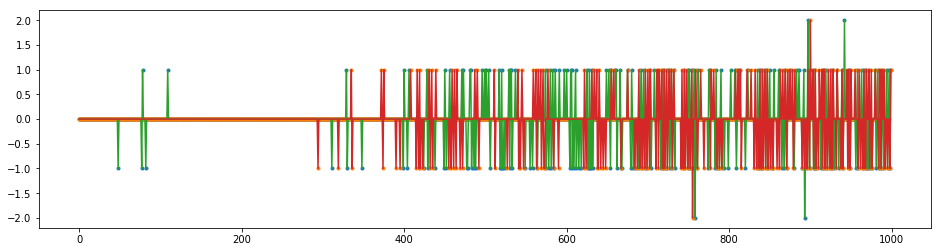

In [34]:
plt.figure(figsize=(16, 4))
plt.plot(data[:1000], '.'); plt.plot(data[:1000], '-');

## MFCC

In [36]:
import os
import librosa

In [52]:
wav, _ = librosa.core.load(fname)
mfcc = librosa.feature.mfcc(wav, n_mfcc=80)
mfcc.shape

(80, 518)

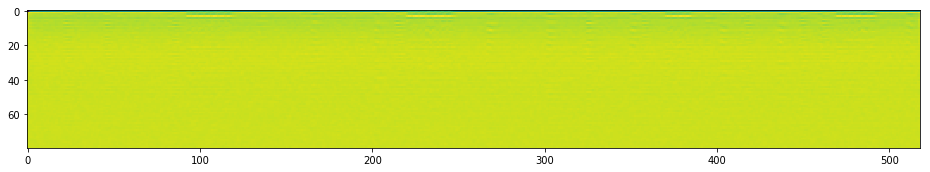

In [53]:
plt.figure(figsize=(16, 6))
plt.imshow(mfcc)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import skew

from tqdm import tqdm, tqdm_pandas

tqdm.pandas()
import scipy